In [1]:
import requests
import pandas as pd

In [2]:
r=requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

r is response

In [3]:
print(r.headers)
print(r.text[:100])

{'ETag': '"22e9fc8d-11c7-2996b79a79ec0"', 'Last-Modified': 'Tue, 09 Mar 1993 00:27:15 GMT', 'Content-Type': 'text/plain; charset=UTF-8', 'Date': 'Fri, 03 Feb 2017 00:44:45 GMT', 'Connection': 'close', 'Accept-Ranges': 'bytes', 'Content-Length': '4551', 'Server': 'Apache/2.2.15 (CentOS)'}
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,


In [4]:
with open('iris.data','w') as fp:
    fp.write(r.text)

In [5]:
df=pd.read_csv('iris.data',names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df['sepal length'][:10]

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
9    4.9
Name: sepal length, dtype: float64

Another way that we can perform this data slicing is to use the .ix[row,column] notation. Let's select the first two columns and first four rows using this notation.
:3 means 0 to 3

In [8]:
df.ix[:3,1]

0    3.5
1    3.0
2    3.2
3    3.1
Name: sepal width, dtype: float64

In [9]:
df[(df['class']=='Iris-setosa') & (df['sepal width']>3.5)]

,sepal length,sepal width,petal length,petal width,class
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa


In [10]:
df[(df['class']=='Iris-setosa') & (df['sepal width']>3.5)].describe()

,sepal length,sepal width,petal length,petal width
count,15.000000,15.000000,15.000000,15.000000
mean,5.293333,3.866667,1.480000,0.273333
std,0.315021,0.225726,0.214476,0.103280
min,4.600000,3.600000,1.000000,0.100000
25%,5.100000,3.700000,1.400000,0.200000
50%,5.300000,3.800000,1.500000,0.200000
75%,5.450000,3.950000,1.550000,0.400000
max,5.800000,4.400000,1.900000,0.400000


In [11]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


df.corr 解释了相关性

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

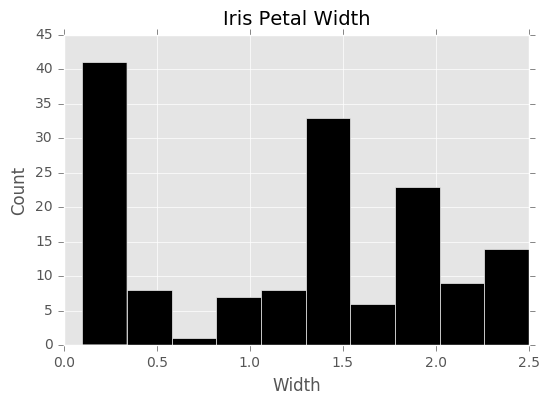

In [13]:
fig,ax=plt.subplots(figsize=(6,4))
ax.hist(df['petal width'],color='black')
ax.set_ylabel('Count',fontsize=12)
ax.set_xlabel('Width',fontsize=12)
plt.title('Iris Petal Width',fontsize=14,y=1.01)

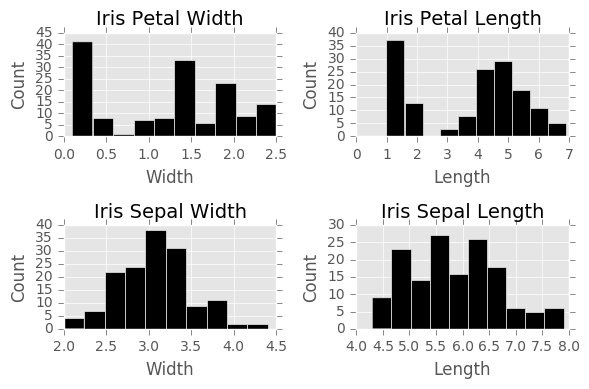

In [14]:
fig,ax=plt.subplots(2,2,figsize=(6,4))
ax[0][0].hist(df['petal width'],color='black')
ax[0][0].set_ylabel('Count',fontsize=12)
ax[0][0].set_xlabel('Width',fontsize=12)
ax[0][0].set_title('Iris Petal Width',fontsize=14,y=1.01)

ax[0][1].hist(df['petal length'],color='black')
ax[0][1].set_ylabel('Count',fontsize=12)
ax[0][1].set_xlabel('Length',fontsize=12)
ax[0][1].set_title('Iris Petal Length',fontsize=14,y=1.01)

ax[1][0].hist(df['sepal width'],color='black')
ax[1][0].set_ylabel('Count',fontsize=12)
ax[1][0].set_xlabel('Width',fontsize=12)
ax[1][0].set_title('Iris Sepal Width',fontsize=14,y=1.01)

ax[1][1].hist(df['sepal length'],color='black')
ax[1][1].set_ylabel('Count',fontsize=12)
ax[1][1].set_xlabel('Length',fontsize=12)
ax[1][1].set_title('Iris Sepal Length',fontsize=14,y=1.01)

plt.tight_layout()

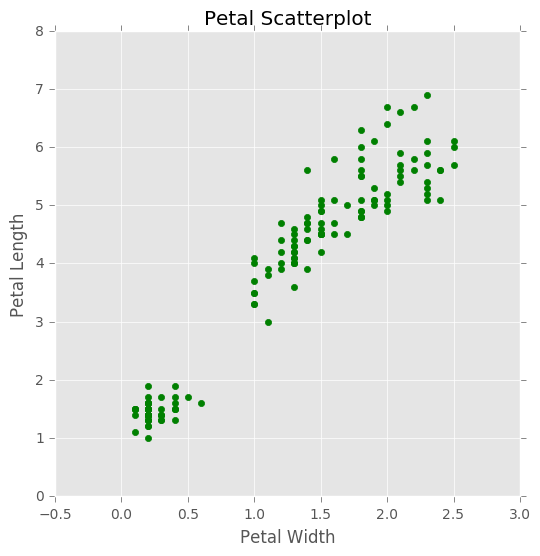

In [15]:
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(df['petal width'],df['petal length'],color='green')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Scatterplot')

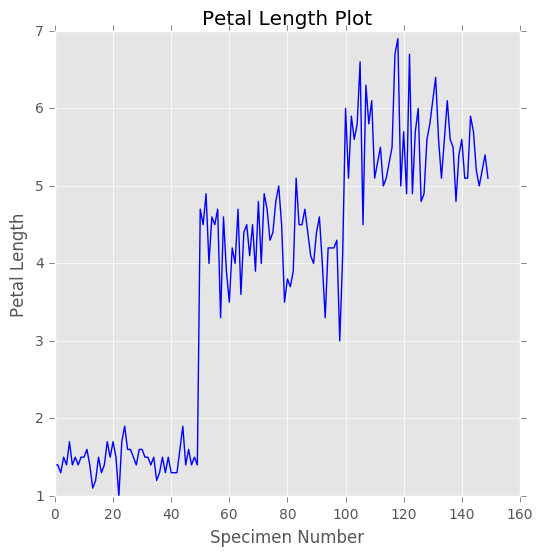

In [16]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(df['petal length'],color='blue')
ax.set_xlabel('Specimen Number')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Length Plot')

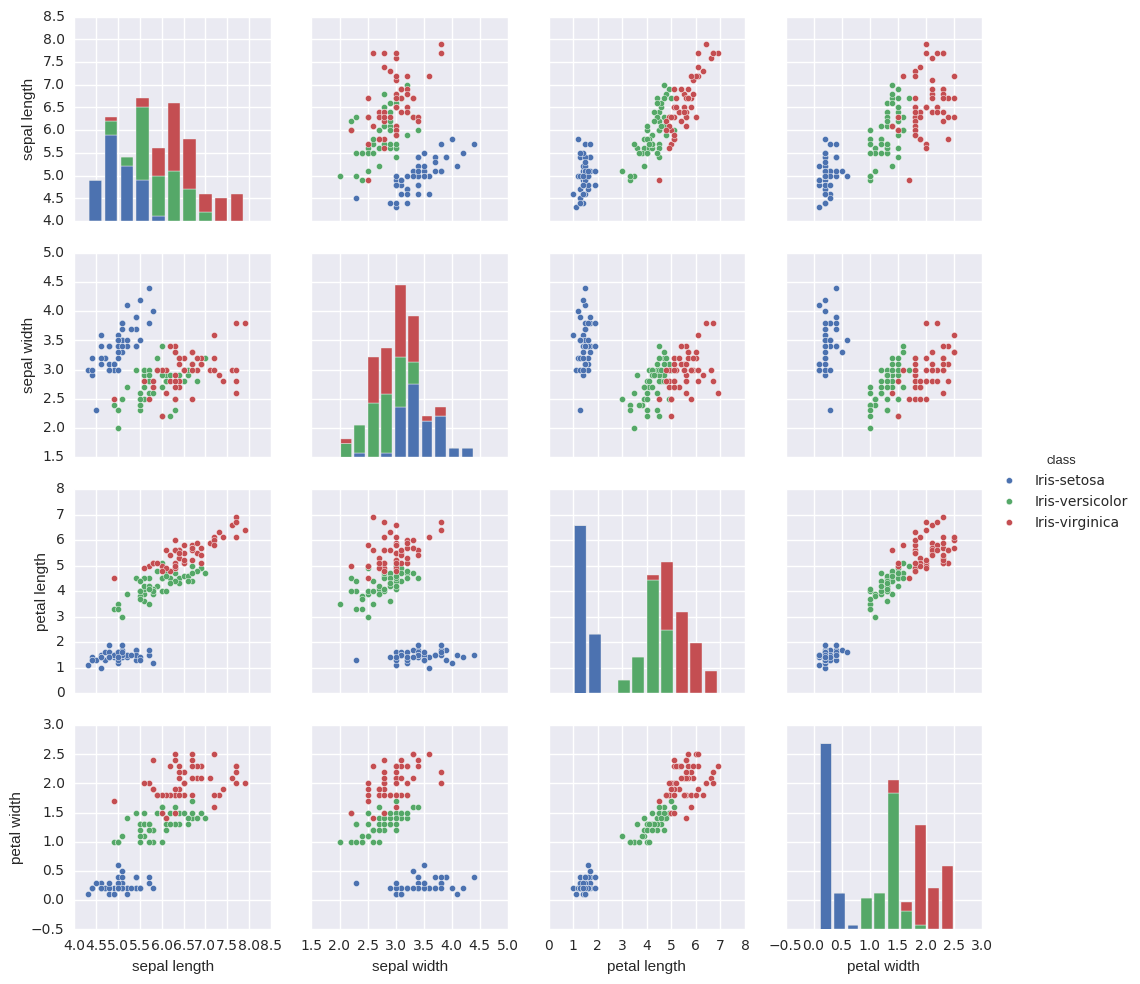

In [17]:
import seaborn as sns
sns.pairplot(df,hue='class')

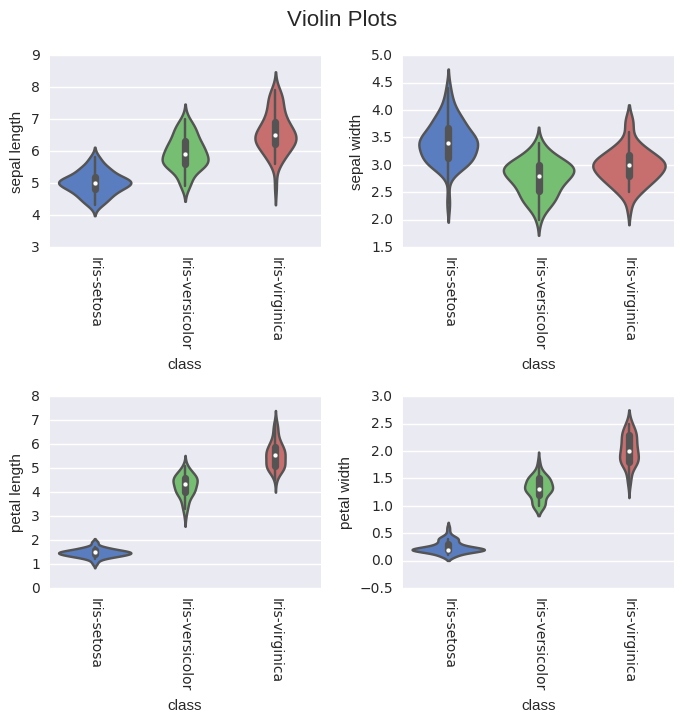

In [18]:
fig,ax=plt.subplots(2,2,figsize=(7,7))
sns.set(style='white',palette='muted')
sns.violinplot(x=df['class'],y=df['sepal length'],ax=ax[0,0])
sns.violinplot(x=df['class'],y=df['sepal width'],ax=ax[0,1])
sns.violinplot(x=df['class'],y=df['petal length'],ax=ax[1,0])
sns.violinplot(x=df['class'],y=df['petal width'],ax=ax[1,1])
fig.suptitle('Violin Plots',fontsize=16,y=1.03)
for i in ax.flat:
    plt.setp(i.get_xticklabels(),rotation=-90)
fig.tight_layout()